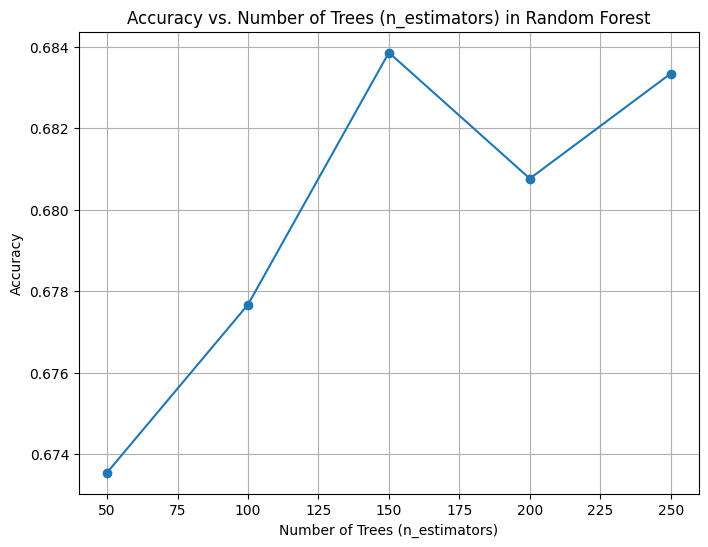

Accuracy with 50 trees: 0.67
Accuracy with 100 trees: 0.68
Accuracy with 150 trees: 0.68
Accuracy with 200 trees: 0.68
Accuracy with 250 trees: 0.68


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

wine_df = pd.read_csv("wine.csv")
wine_df.dropna(axis=0, inplace=True)

label_encoder = LabelEncoder()
wine_df['type'] = label_encoder.fit_transform(wine_df['type'])

features = wine_df.columns.drop('quality')
X = wine_df[features]
y = wine_df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Vary the number of trees (n_estimators)
n_estimators_values = [50, 100, 150, 200, 250]
accuracies = []

for n_estimators in n_estimators_values:
    rf_classifier = RandomForestClassifier(n_estimators=n_estimators, random_state=5)
    rf_classifier.fit(X_train_scaled, y_train)
    y_pred = rf_classifier.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Create a graph to visualize accuracy vs. n_estimators
plt.figure(figsize=(8, 6))
plt.plot(n_estimators_values, accuracies, marker='o')
plt.title('Accuracy vs. Number of Trees (n_estimators) in Random Forest')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# Print the accuracies
for n_estimators, accuracy in zip(n_estimators_values, accuracies):
    print(f"Accuracy with {n_estimators} trees: {accuracy:.2f}")
